In [1]:
import pdfplumber

{'Resumo': {'RESUMO DOS NEGÓCIOS': {'Debêntures': 'R$0,00', 'Vendas à vista': 'R$0,00', 'Compras à vista': 'R$103,18', 'Total de Negócios': 'R$103,18'}, 'Tributos': {'ISS': 'R$0,00', 'PIS': 'R$0,00', 'COFINS': 'R$0,00', 'IRRF Operação Comum': 'R$0,00', 'IRRF Day Trade': 'R$0,00', 'Total de Tributos': 'R$0,00'}, 'CUSTOS': {'Taxa Registro': 'R$0,00', 'Emolumentos': 'R$0,00', 'Taxa de termo/opções': 'R$0,00', 'Taxa Operacional': 'R$0,00', 'Taxa de Liquidação': '-R$0,02', 'Total de Custos': '-R$0,02'}, 'RESULTADO': {'Valor das Operações': '-R$103,18', 'Tributos': 'R$0,00', 'Custos': '-R$0,02', 'LÍQUIDO DA NOTA': '-R$103,20', 'LÍQUIDAÇÃO': '17/10/2019'}}}


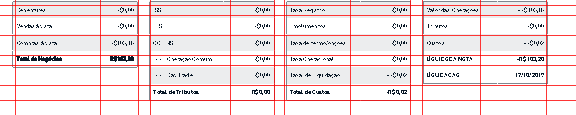

In [61]:
with pdfplumber.open("Toro.pdf") as pdf:
    page = pdf.pages[0]
    all_text = ''
    text = page.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')
    
    coluna_resumo = page.crop((20, 155, page.width, 270))
    resumo_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": [35, 120, 158, 170, 250, 294, 304, 370, 430, 442, 500, 566],
        "explicit_horizontal_lines": [160, 170, 190, 210, 220, 240, 255]
    }
    table_resumo = coluna_resumo.extract_table(resumo_settings)
    #print(table_resumo)
    i = 0
    resumo_list = []
    while i <= len(table_resumo) - 1:
        if table_resumo[i][4] != '':
            resumo_list.append(table_resumo[i])
        i += 1
    
    #print(resumo_list)
    obj = {
        "Resumo": {
            "RESUMO DOS NEGÓCIOS": {
                resumo_list[0][0]: resumo_list[0][1],
                resumo_list[1][0]: resumo_list[1][1],
                resumo_list[2][0]: resumo_list[2][1],
                resumo_list[3][0]: resumo_list[3][1]
            },
            "Tributos": {
                resumo_list[0][3]: resumo_list[0][4],
                resumo_list[1][3]: resumo_list[1][4],
                resumo_list[2][3]: resumo_list[2][4],
                resumo_list[3][3]: resumo_list[3][4],
                resumo_list[-3][3]: resumo_list[-3][4],
                resumo_list[-2][3]: resumo_list[-2][4],
                resumo_list[-1][3]: resumo_list[-1][4]
            },
            "CUSTOS": {
                resumo_list[0][6]: resumo_list[0][7],
                resumo_list[1][6]: resumo_list[1][7],
                resumo_list[2][6]: resumo_list[2][7],
                resumo_list[3][6]: resumo_list[3][7],
                resumo_list[-2][6]: resumo_list[-2][7],
                resumo_list[-1][6]: resumo_list[-1][7],
            },
            "RESULTADO": {
                resumo_list[0][9]: resumo_list[0][10],
                resumo_list[1][9]: resumo_list[1][10],
                resumo_list[2][9]: resumo_list[2][10],
                resumo_list[3][9]: resumo_list[3][10],
                resumo_list[-2][-2]: resumo_list[-2][-1],
            }
        }
    }
    print(obj)
    
im = coluna_resumo.to_image()
im.draw_vlines([35, 120, 158, 170, 250, 294, 304, 370, 430, 442, 500, 566])
im.draw_hlines([160, 170, 190, 210, 220, 240, 255])

{'CV': 'COMPRA', 'Mercado': 'BOVESPA 1', 'Quantidade': '1', 'Preço': 'R$103,18', 'Valor_Operação': 'R$103,18', 'Vencimento': '', 'Tipo_Mercado': 'VISTA', 'Envio': '', 'OBS': ''}


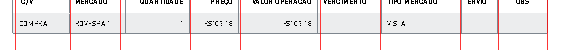

In [54]:
    coluna_detalhes = page.crop((20, 430, page.width, 480))
    detalhes_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [35, 90, 140, 210, 260, 340, 400, 480, 518, 567]
    }
    tabela_detalhes = coluna_detalhes.extract_table(detalhes_settings)
    
    obj_detalhes = {
        "CV": tabela_detalhes[0][0],
        "Mercado": tabela_detalhes[0][1],
        "Quantidade": tabela_detalhes[0][2],
        "Preço": tabela_detalhes[0][3],
        "Valor_Operação": tabela_detalhes[0][4],
        "Vencimento": tabela_detalhes[0][5],
        "Tipo_Mercado": tabela_detalhes[0][6],
        "Envio": tabela_detalhes[0][7],
        "OBS": tabela_detalhes[0][8]
    }

im = coluna_detalhes.to_image()
im.draw_vlines([
    35, 90, 140, 210, 260, 340, 400, 480, 518, 567
])

In [68]:
    linha14 = row[14].split()
    obj = {
        "Titulo": row[13],
        "Preco de Exercício": linha14[3],
        "Quantidade_total_de_compra": linha14[8],
        "Preço_médio_compra": f"{linha14[12]} {row[15]}",
        "Quantidade_total_de_venda": linha14[17],
        "Preço_médio_venda": f"{linha14[21]}{linha14[22]}"
    }
    print(obj)

{'Titulo': 'KNCR11 - FII KINEA RI CI', 'Preco de Exercício': 'R$0,00', 'Quantidade_total_de_compra': '1', 'Preço_médio_compra': 'R$ 103,1800', 'Quantidade_total_de_venda': '0', 'Preço_médio_venda': 'R$0,0000'}


{'titulo': 'Legenda', 'dados_2': '2 - Corretora ou pessoa vinculada atuou na contraparte', 'dados_P': 'P - Carteira Própria', 'dados_negocio': '# Negócio direto', 'dados_H': 'H - Home Broker', 'dados_8': '8 - Líquidação Institucional', 'dados_X': 'X - Box', 'dados_D': 'D - Day-Trade', 'dados_Y': 'Y - Desmanche de Box', 'dados_F': 'F - Cobertura', 'dados_L': 'L - Precatório', 'dados_B': 'B - Debêntures', 'dados_T': 'T - Liquidação pelo Bruto', 'dados_A': 'A - Posição futuro', 'dados_I': 'I - POP', 'dados_C': 'C - Clube e fundos de ações'}


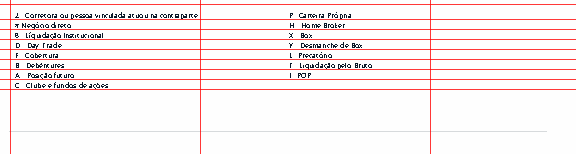

In [97]:
    coluna_legenda = page.crop((20, 496, page.width, 650))
    legenda_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [30, 220, 450],
        "explicit_horizontal_lines": [500, 515, 525, 535, 545, 555, 565, 575, 585]
    }
    tabela_legenda = coluna_legenda.extract_table(legenda_settings)
    
    obs = {
        "titulo": "Legenda",
        "dados_2": tabela_legenda[0][0],
        "dados_P": tabela_legenda[0][1],
        "dados_negocio": tabela_legenda[1][0],
        "dados_H": tabela_legenda[1][1],
        "dados_8": tabela_legenda[2][0],
        "dados_X": tabela_legenda[2][1],
        "dados_D": tabela_legenda[3][0],
        "dados_Y": tabela_legenda[3][1],
        "dados_F": tabela_legenda[4][0],
        "dados_L": tabela_legenda[4][1],
        "dados_B": tabela_legenda[5][0],
        "dados_T": tabela_legenda[5][1],
        "dados_A": tabela_legenda[6][0],
        "dados_I": tabela_legenda[6][1],
        "dados_C": tabela_legenda[7][0]
    }
    print(obs)
im = coluna_legenda.to_image()
im.draw_vlines([30, 220, 450])
im.draw_hlines([500, 515, 525, 535, 545, 555, 565, 575, 585])

In [108]:
    linha_dt = row[-11].split()
    dt_obs = row[-11].split('Especificações diversas: IRRF Day Trade: Base R$0,00 Projeção R$0,00')
    linha_oc = row[-10].split()
    obj = {
        "Especificações diversas": {
            "IRRF_Day_Trade": {
                "Base": linha_dt[6],
                "Projeção": linha_dt[8],
                "obs": dt_obs[-1]
            },
            "IRRF_Operação_Comum": {
                "Base": linha_oc[4],
                "Projeção": linha_oc[6],
                "obs": row[-9]
            },
            "informação_adicional": f"{row[-8]} {row[-7]} {row[-6]} {row[-5]} {row[-4]} {row[-3]} {row[-2]}"
        }
    }
    print(obj)

{'Especificações diversas': {'IRRF_Day_Trade': {'Base': 'R$0,00', 'Projeção': 'R$0,00', 'obs': ' O valor do IRRF s/ Day Trade já está descontado do Líquido da Nota.'}, 'IRRF_Operação_Comum': {'Base': 'R$0,00', 'Projeção': 'R$0,00.', 'obs': 'IRRF Operação Comum é debito somente quando atinge o valor superior a R$ 1,00 (um real)'}, 'informação_adicional': 'Estas informações são confidenciais e destinadas a indivíduo e propósito específicos, sendo protegidas por lei. Caso você não seja a pessoa a quem foi dirigido este documento, deve apagá-lo. É terminantemente proibida a utilização, acesso, cópia ou divulgação não autorizada destas informações. Ressaltamos que a nota de corretagem é elaborada a partir de diversas fontes de consulta e estas informações são atualizadas em diferentes momentos. Sendo assim, as informações constantes neste documento podem sofrer alterações a qualquer momento e, quando da consulta, apresentarem alguma defasagem. Os valores de corretagem e os tributos incident